<a href="https://colab.research.google.com/github/Hasindu123e/Churn-data-prediction/blob/main/churn__data_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv("/content/sample_data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [27]:
#load and inspect data
print("\n--- Dataset Info ---\n")
df.info()

print("\n--- Missing Values ---\n")
print(df.isnull().sum())

print("\n--- Summary Statistics (Numerical) ---\n")
print(df.describe())



--- Dataset Info ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7

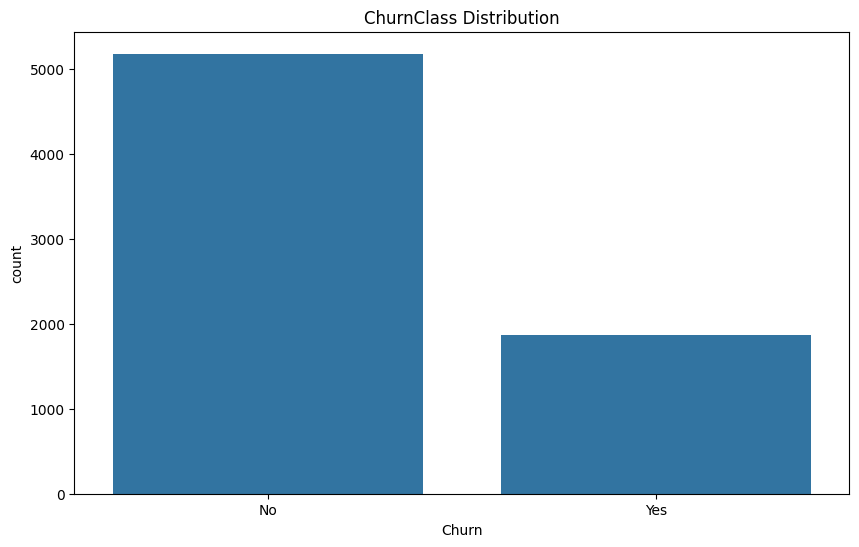

In [28]:
#Class Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x="Churn", data=df)
plt.title("ChurnClass Distribution")
plt.show()


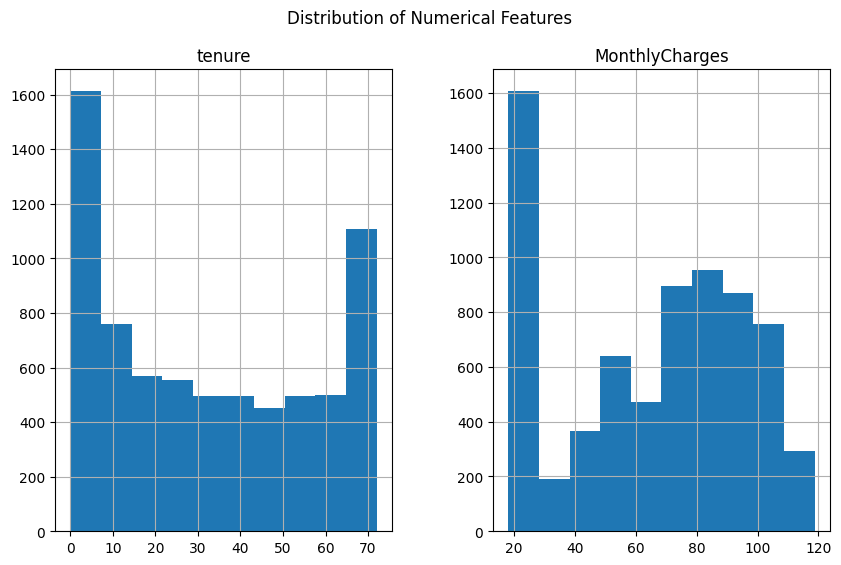

In [29]:
# Numerical feature histrograms
numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"]
df[numerical_features].hist(figsize=(10, 6))
plt.suptitle("Distribution of Numerical Features")
plt.show()


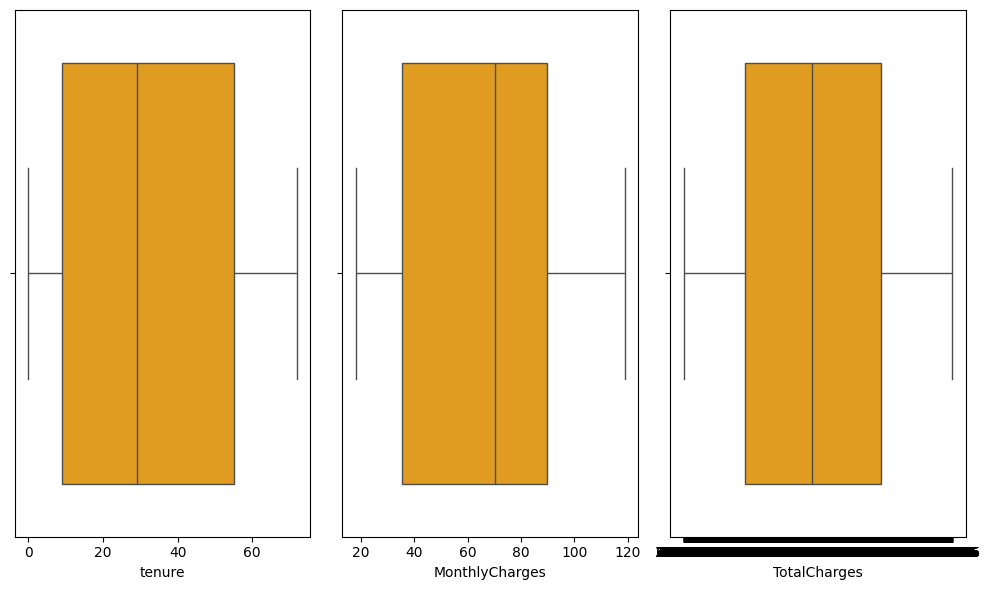

In [30]:
#Boxplots to Check Outliers
plt.figure(figsize=(10, 6))
for i,col in enumerate(numerical_features):
  plt.subplot(1,3,i+1)
  sns.boxplot(x=df[col],color="orange")
  plt.tight_layout()
plt.show()

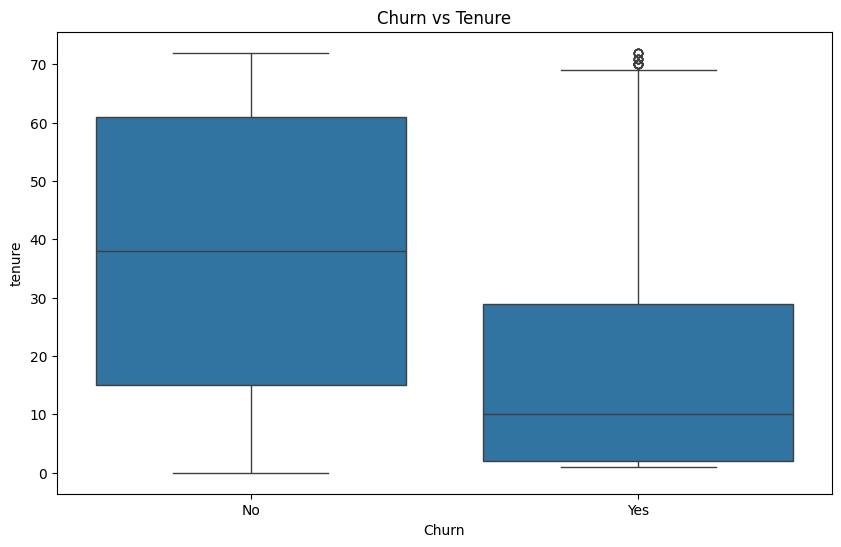

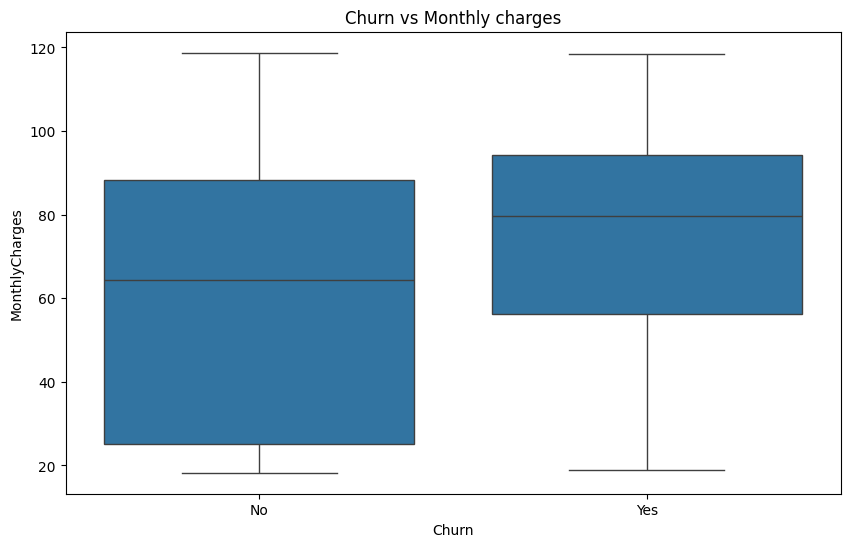

In [31]:
#compare churn with Tenure
plt.figure(figsize=(10, 6))
sns.boxplot(x="Churn", y="tenure", data=df)
plt.title("Churn vs Tenure")
plt.show()

#compare churn with Monthly charges
plt.figure(figsize=(10, 6))
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Churn vs Monthly charges")
plt.show()

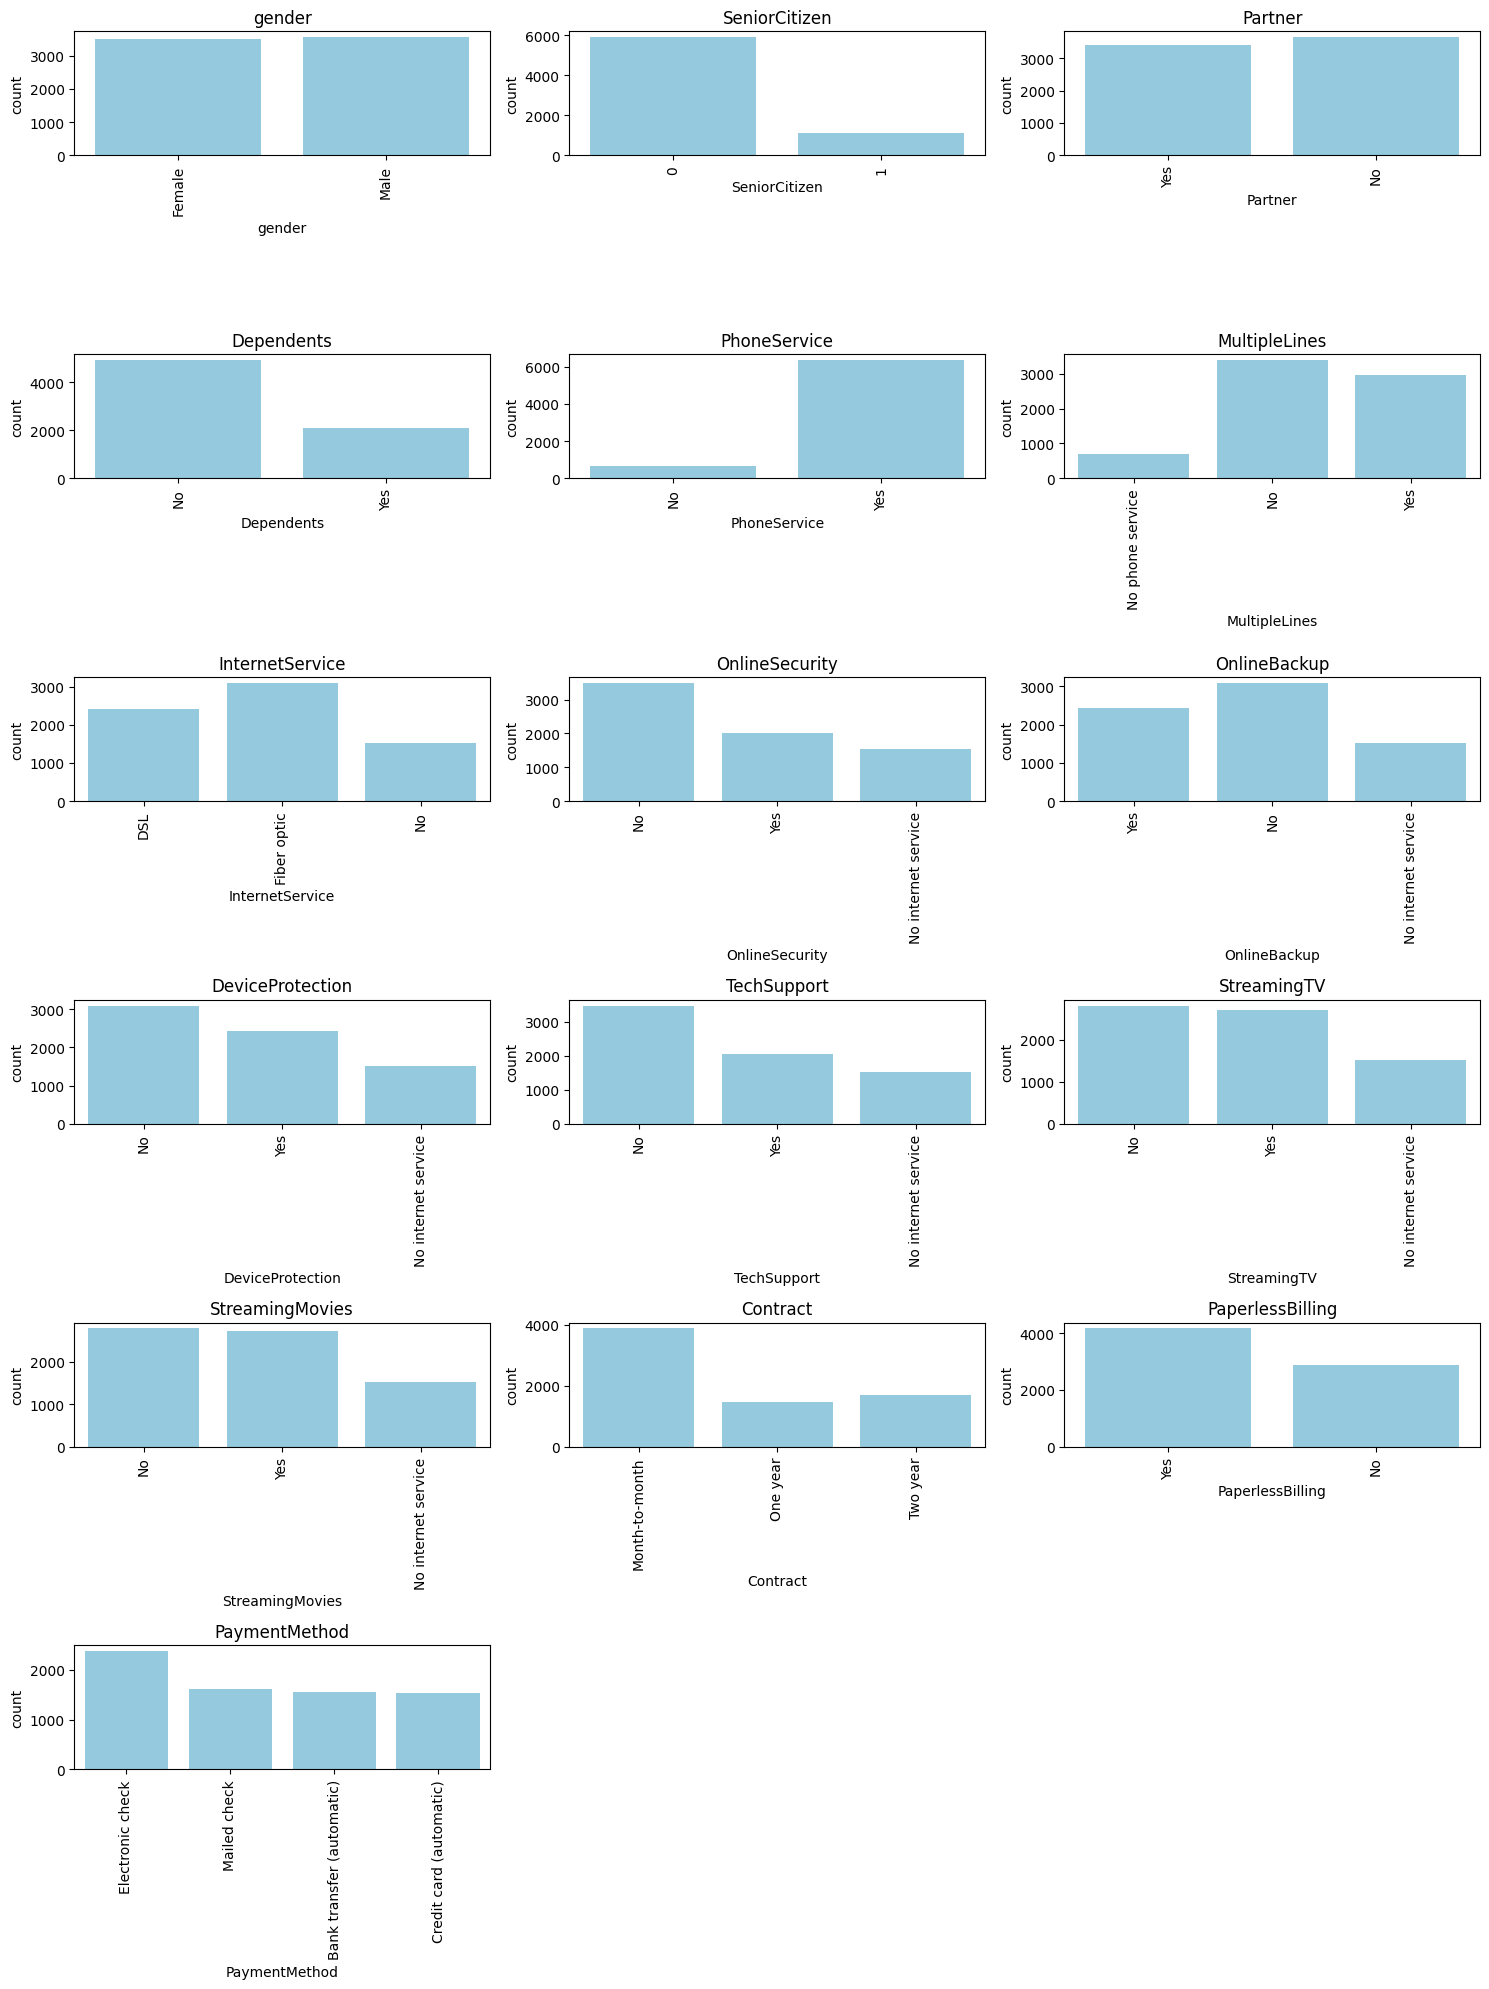

In [32]:
#categorical feature distrubution
cat_cols=["gender","SeniorCitizen","Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod"]

plt.figure(figsize=(15, 20))
for i, col in enumerate(cat_cols):
    plt.subplot(6, 3, i+1)
    sns.countplot(data=df, x=col, color="skyblue")
    plt.xticks(rotation=90)
    plt.title(col)

plt.tight_layout()
plt.show()

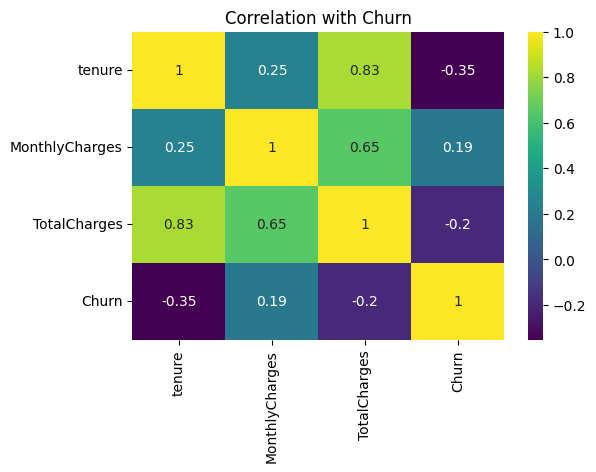

In [35]:
df_corr = df.copy()
# Convert 'TotalCharges' to numeric and handle missing values
df_corr["TotalCharges"] = pd.to_numeric(df_corr["TotalCharges"], errors="coerce")
df_corr["TotalCharges"] = df_corr["TotalCharges"].fillna(df_corr["TotalCharges"].median())

df_corr["Churn"] = df_corr["Churn"].map({"Yes":1, "No":0})

plt.figure(figsize=(6,4))
sns.heatmap(df_corr[numerical_features + ["Churn"]].corr(), annot=True, cmap="viridis")
plt.title("Correlation with Churn")
plt.show()

In [36]:
# data preprocessing pipe line
# convert the total charges to numeric again
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

#drop customer id column
df.drop("customerID", axis=1, inplace=True)

#covert the target attribut which is churn to binary
df["Churn"] = df["Churn"].map({"Yes":1, "No":0})

#do hotencoding for all the categirical features
cat_cols = df.select_dtypes(include=["object"]).columns

df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

/tmp/ipython-input-2315354307.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


In [38]:
from sklearn.preprocessing import StandardScaler

# standardize scaling for numerical features
scaler = StandardScaler()
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

In [42]:
#Split Into Train/Test Sets
x=df_encoded.drop("Churn", axis=1)
y=df_encoded["Churn"]

x_train ,x_test ,y_train ,y_test=train_test_split (x,y,test_size=0.2,random_state=42 , stratify=y)

print("Training Shape:", x_train.shape)
print("Testing Shape:", x_test.shape)

Training Shape: (5634, 30)
Testing Shape: (1409, 30)


Best Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}

Decision Tree Accuracy: 0.78708303761533

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1035
           1       0.67      0.39      0.49       374

    accuracy                           0.79      1409
   macro avg       0.74      0.66      0.68      1409
weighted avg       0.77      0.79      0.77      1409



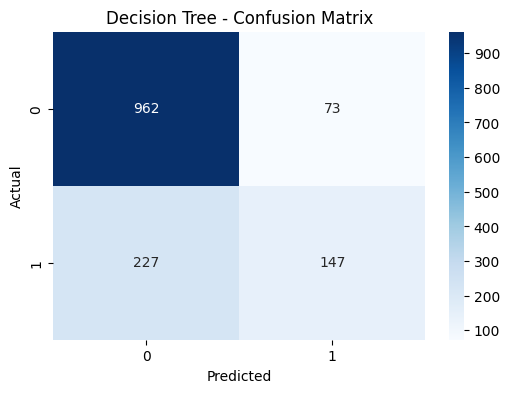

In [44]:

#DECISION TREE CLASSIFIER


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt


# 1. Hyperparameter Tuning


dt_params = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 5, 7, 9, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

dt = DecisionTreeClassifier(random_state=42)

grid_dt = GridSearchCV(
    estimator=dt,
    param_grid=dt_params,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid_dt.fit(x_train, y_train)

print("Best Decision Tree Parameters:", grid_dt.best_params_)

best_dt = grid_dt.best_estimator_


# 2. Model Prediction


dt_pred = best_dt.predict(x_test)



# 3. Evaluation Metrics


dt_accuracy = accuracy_score(y_test, dt_pred)
print("\nDecision Tree Accuracy:", dt_accuracy)

print("\nClassification Report:")
print(classification_report(y_test, dt_pred))

# 4. Confusion Matrix


plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, dt_pred),
            annot=True, fmt="d", cmap="Blues")
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Best Neural Network Parameters: {'activation': 'tanh', 'hidden_layer_sizes': (128,), 'learning_rate_init': 0.001, 'max_iter': 300, 'solver': 'adam'}

Neural Network Accuracy: 0.7877927608232789

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1035
           1       0.62      0.53      0.57       374

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.78      1409



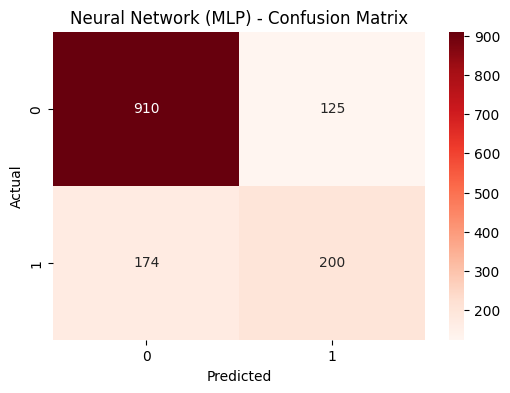

In [45]:

# NEURAL NETWORK CLASSIFIER (MLP)

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt


# 1. Hyperparameter Tuning


mlp_params = {
    "hidden_layer_sizes": [(32,), (64,), (128,), (64,32), (128,64)],
    "activation": ["relu", "tanh"],
    "solver": ["adam"],
    "learning_rate_init": [0.001, 0.01],
    "max_iter": [300]
}

mlp = MLPClassifier(random_state=42)

grid_mlp = GridSearchCV(
    estimator=mlp,
    param_grid=mlp_params,
    cv=3,
    scoring="accuracy",
    n_jobs=-1
)

grid_mlp.fit(x_train, y_train)

print("Best Neural Network Parameters:", grid_mlp.best_params_)

best_mlp = grid_mlp.best_estimator_


# 2. Model Prediction


mlp_pred = best_mlp.predict(x_test)

# 3. Evaluation Metrics


mlp_accuracy = accuracy_score(y_test, mlp_pred)
print("\nNeural Network Accuracy:", mlp_accuracy)

print("\nClassification Report:")
print(classification_report(y_test, mlp_pred))


# 4. Confusion Matrix


plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, mlp_pred),
            annot=True, fmt="d", cmap="Reds")
plt.title("Neural Network (MLP) - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



==================== MODEL COMPARISON ====================
Decision Tree Accuracy: 0.7871
Neural Network Accuracy: 0.7878


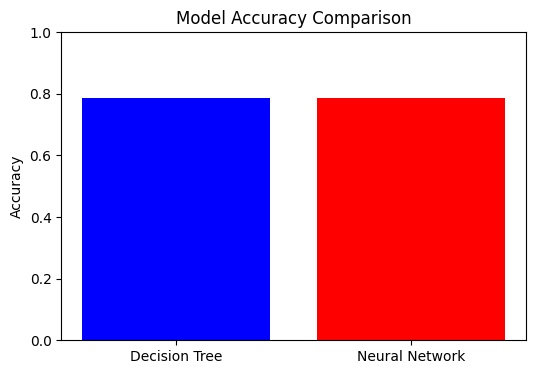


Classification Report - Decision Tree:
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1035
           1       0.67      0.39      0.49       374

    accuracy                           0.79      1409
   macro avg       0.74      0.66      0.68      1409
weighted avg       0.77      0.79      0.77      1409


Classification Report - Neural Network:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1035
           1       0.62      0.53      0.57       374

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.78      1409



In [46]:

#MODEL COMPARISON SECTION


import matplotlib.pyplot as plt

# Accuracy of both models
model_names = ["Decision Tree", "Neural Network"]
accuracies = [dt_accuracy, mlp_accuracy]

print("\n==================== MODEL COMPARISON ====================")
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"Neural Network Accuracy: {mlp_accuracy:.4f}")


# 1. Accuracy Bar Chart


plt.figure(figsize=(6,4))
plt.bar(model_names, accuracies, color=["blue", "red"])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

# 2. Print other metrics (F1-score, etc.)


print("\nClassification Report - Decision Tree:")
print(classification_report(y_test, dt_pred))

print("\nClassification Report - Neural Network:")
print(classification_report(y_test, mlp_pred))


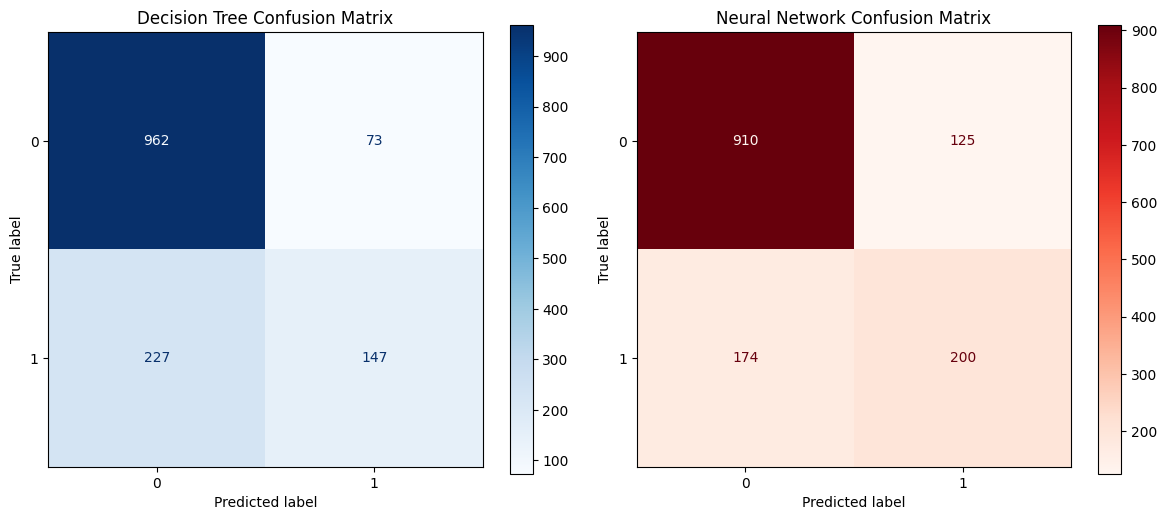

In [48]:
#        SIDE-BY-SIDE CONFUSION MATRICES

from sklearn.metrics import ConfusionMatrixDisplay
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay.from_predictions(y_test, dt_pred, cmap="Blues", ax=axes[0])
axes[0].set_title("Decision Tree Confusion Matrix")

ConfusionMatrixDisplay.from_predictions(y_test, mlp_pred, cmap="Reds", ax=axes[1])
axes[1].set_title("Neural Network Confusion Matrix")

plt.tight_layout()
plt.show()


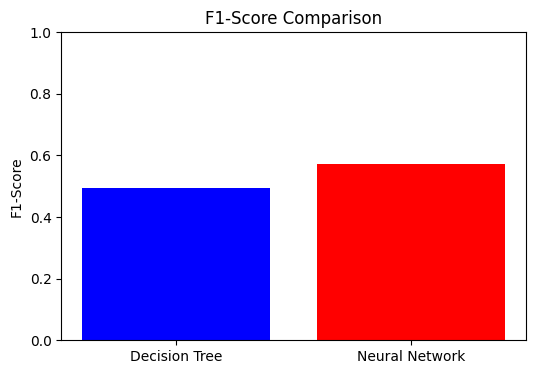

Decision Tree F1-Score: 0.494949494949495
Neural Network F1-Score: 0.5722460658082976


In [49]:

# F1-SCORE COMPARISON BAR CHART


from sklearn.metrics import f1_score

dt_f1 = f1_score(y_test, dt_pred)
mlp_f1 = f1_score(y_test, mlp_pred)

plt.figure(figsize=(6,4))
plt.bar(["Decision Tree", "Neural Network"], [dt_f1, mlp_f1],
        color=["blue", "red"])
plt.title("F1-Score Comparison")
plt.ylabel("F1-Score")
plt.ylim(0, 1)
plt.show()

print("Decision Tree F1-Score:", dt_f1)
print("Neural Network F1-Score:", mlp_f1)
